In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#LOADING AND PREPROCESSING

In [2]:
dataset = pd.read_csv('train.csv')

In [3]:
print(dataset.shape)
dataset.head()

(45211, 11)


,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [4]:
dataset.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [5]:
dataset.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [6]:
dataset = dataset.dropna(axis=0)

In [7]:
dataset.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

 # EXPLORATORY DATA ANALYSIS

In [8]:
dataset.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

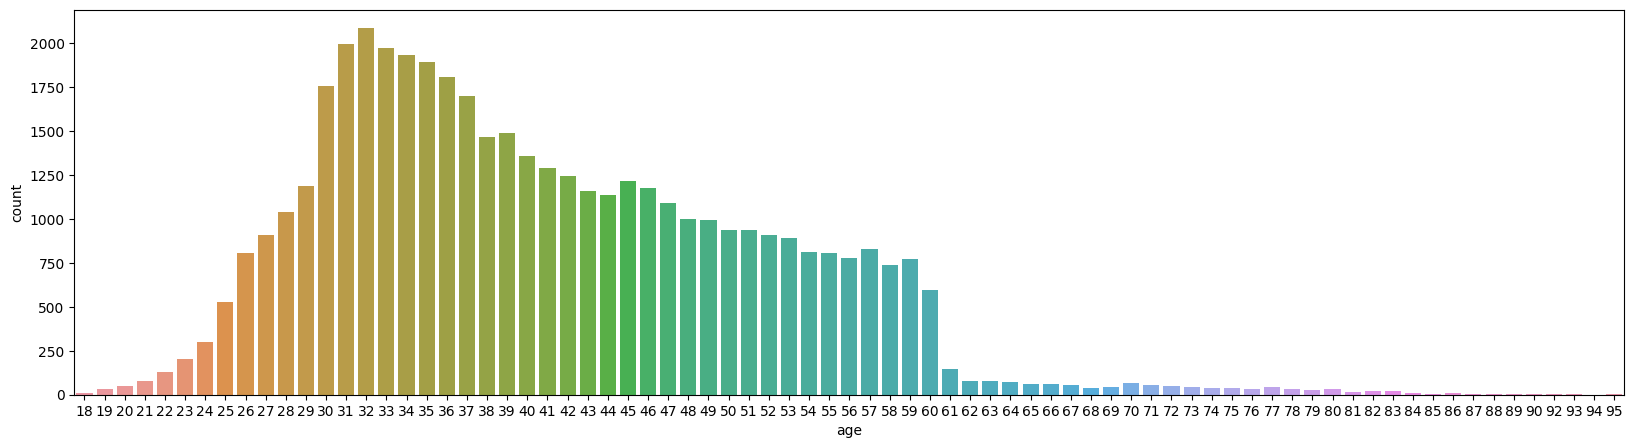

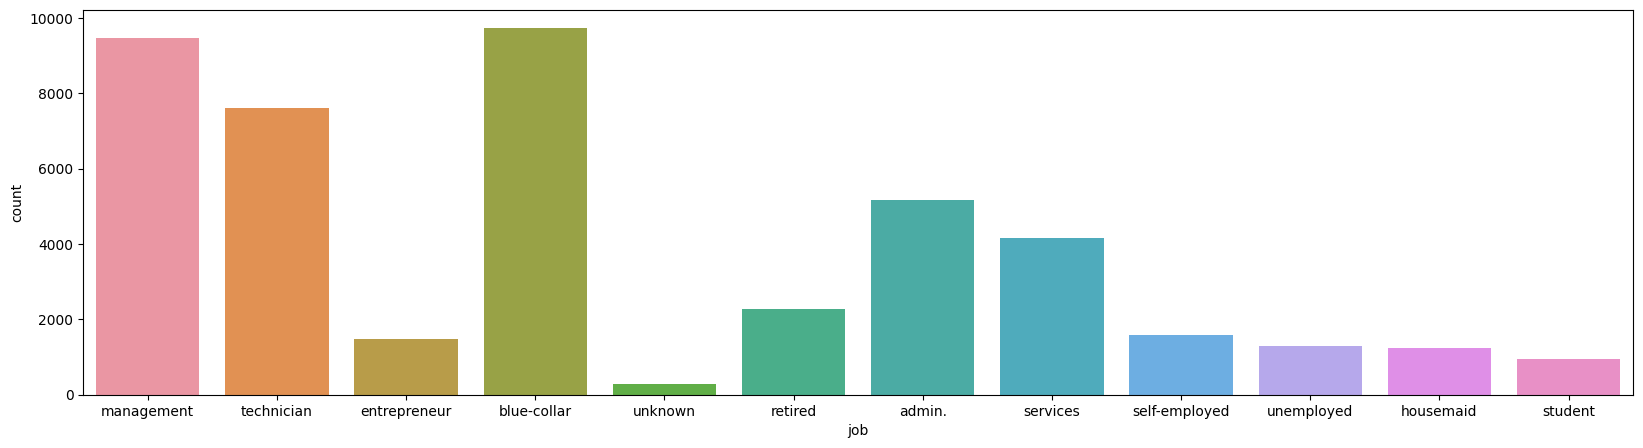

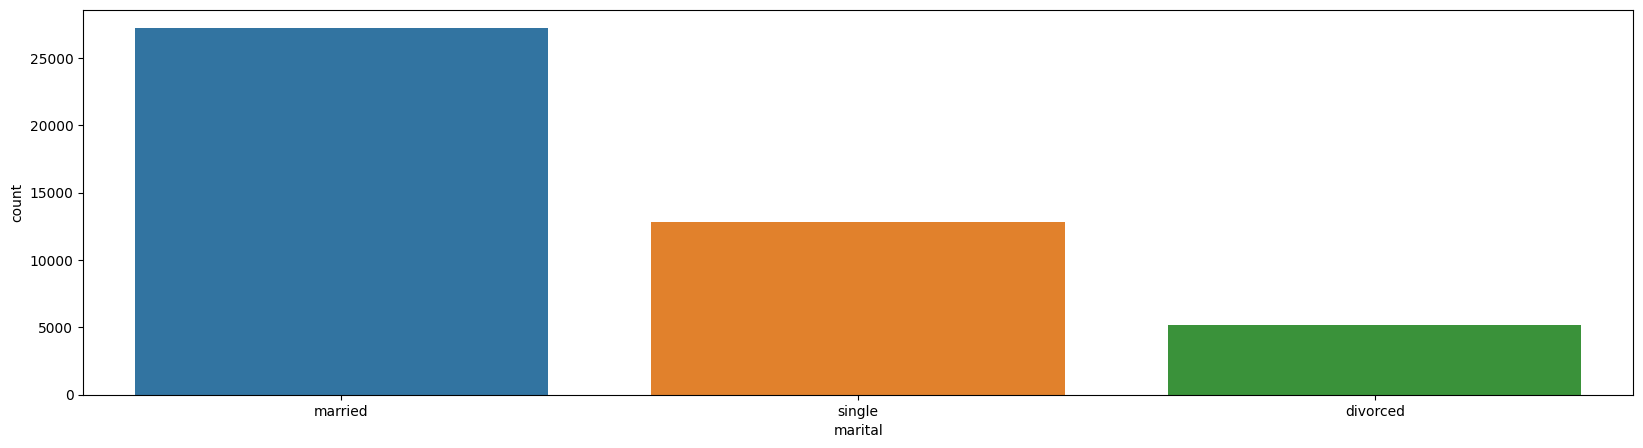

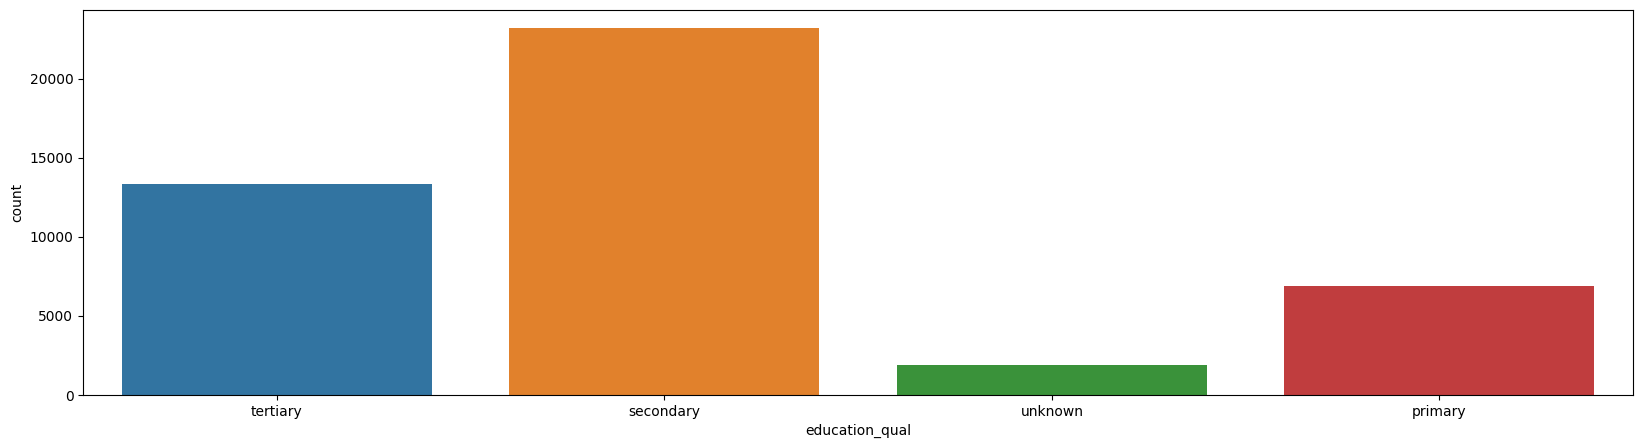

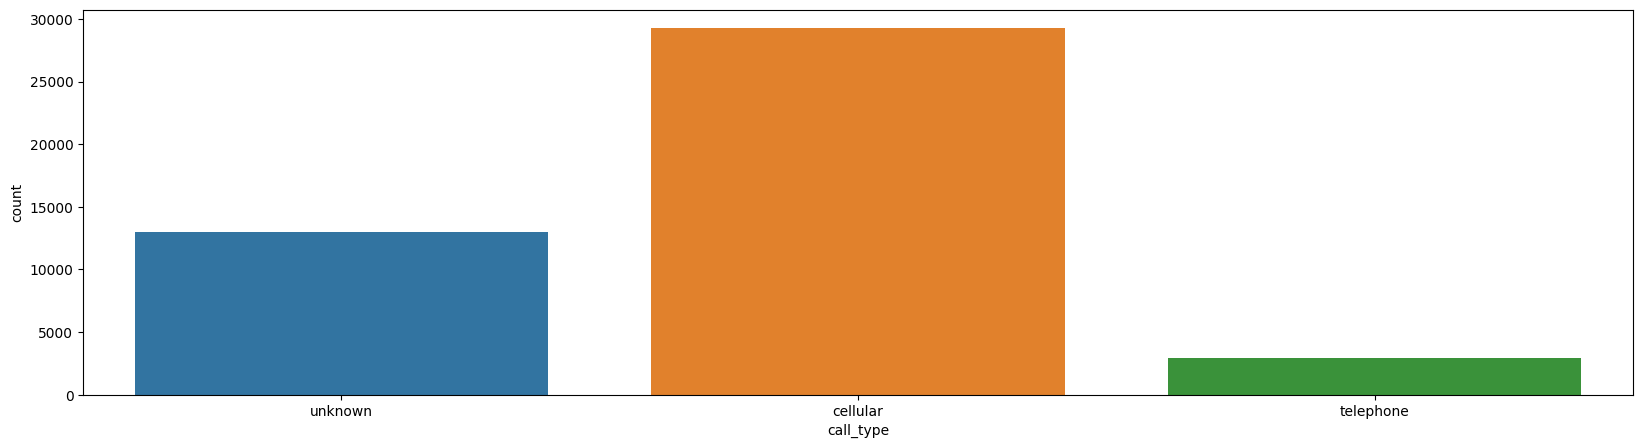

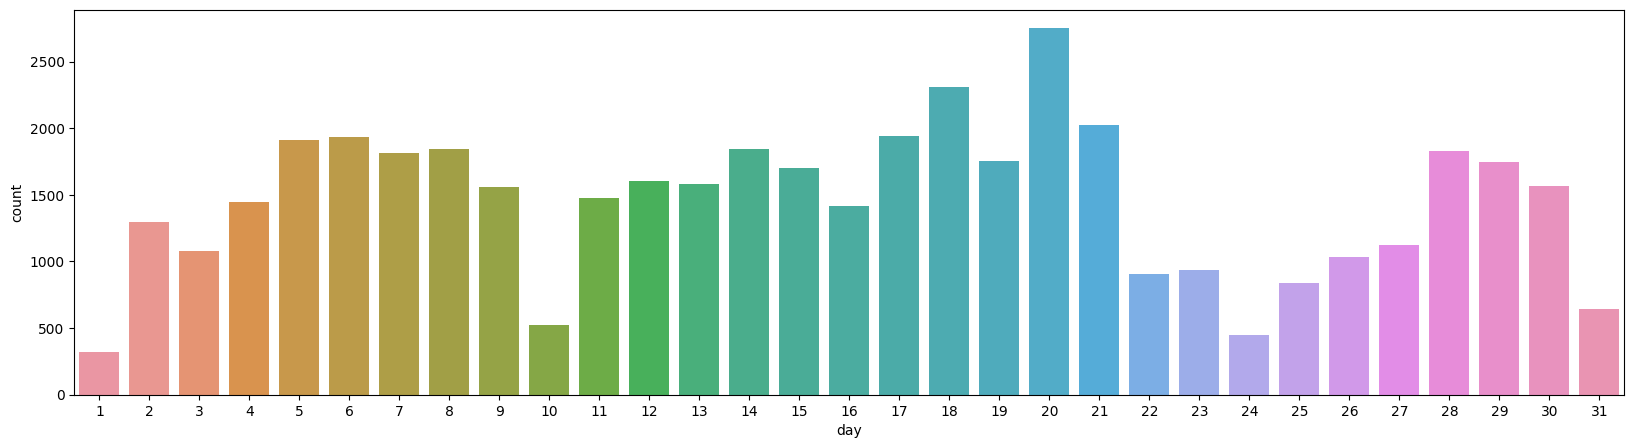

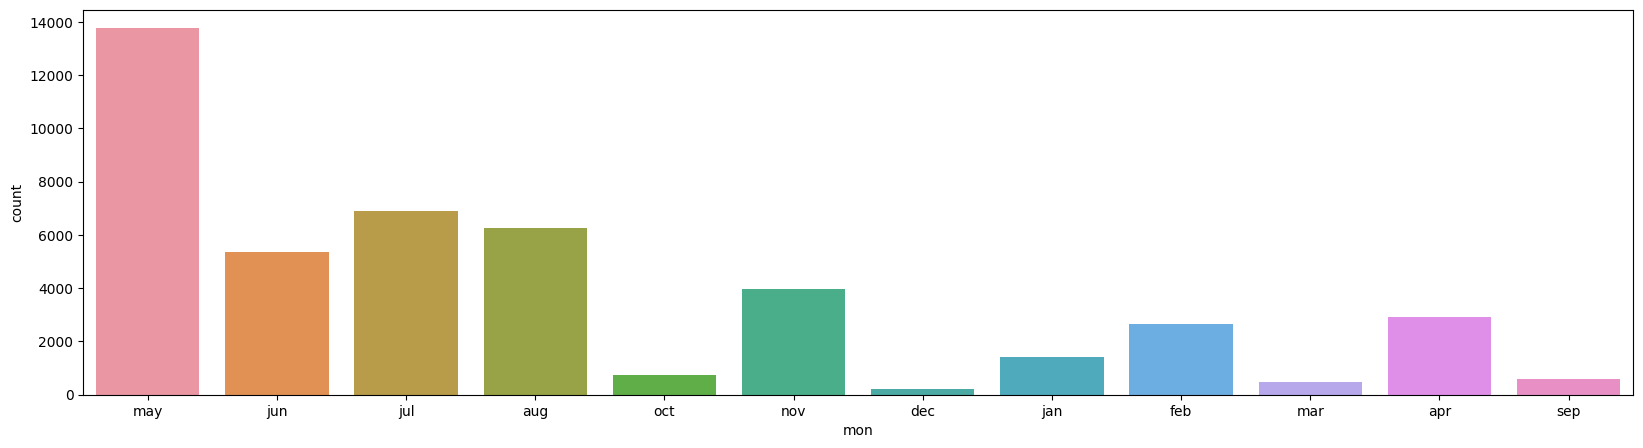

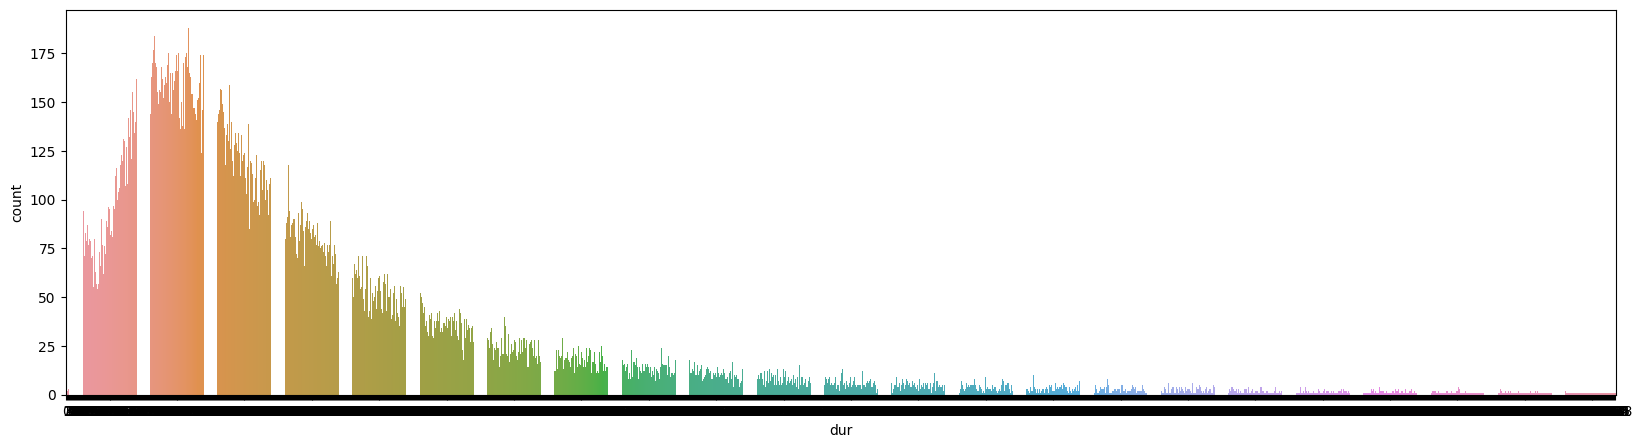

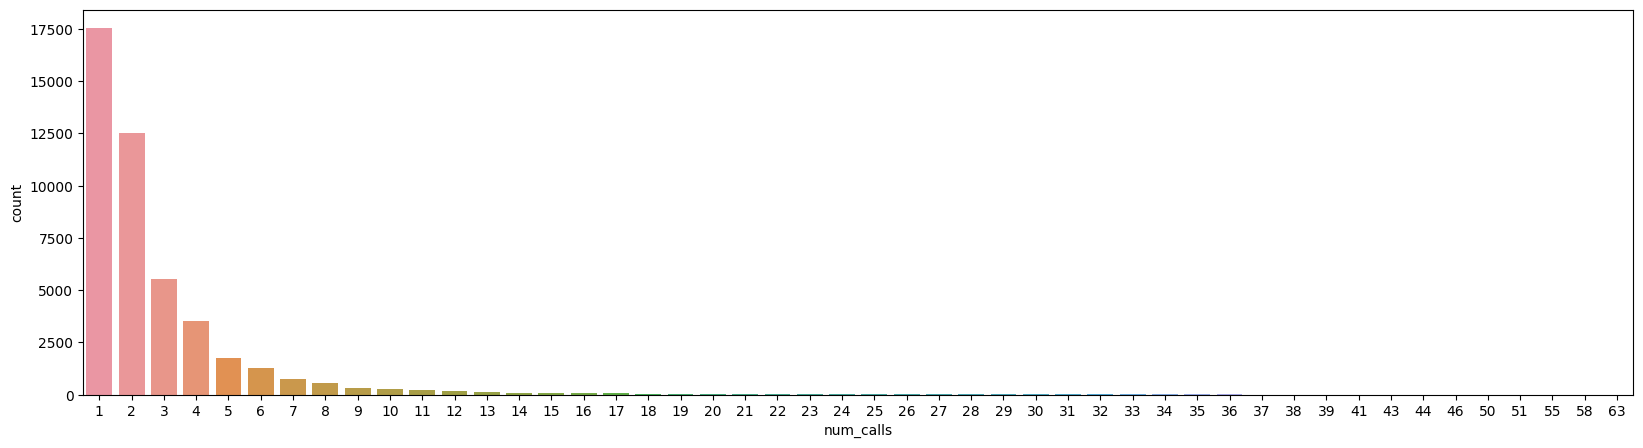

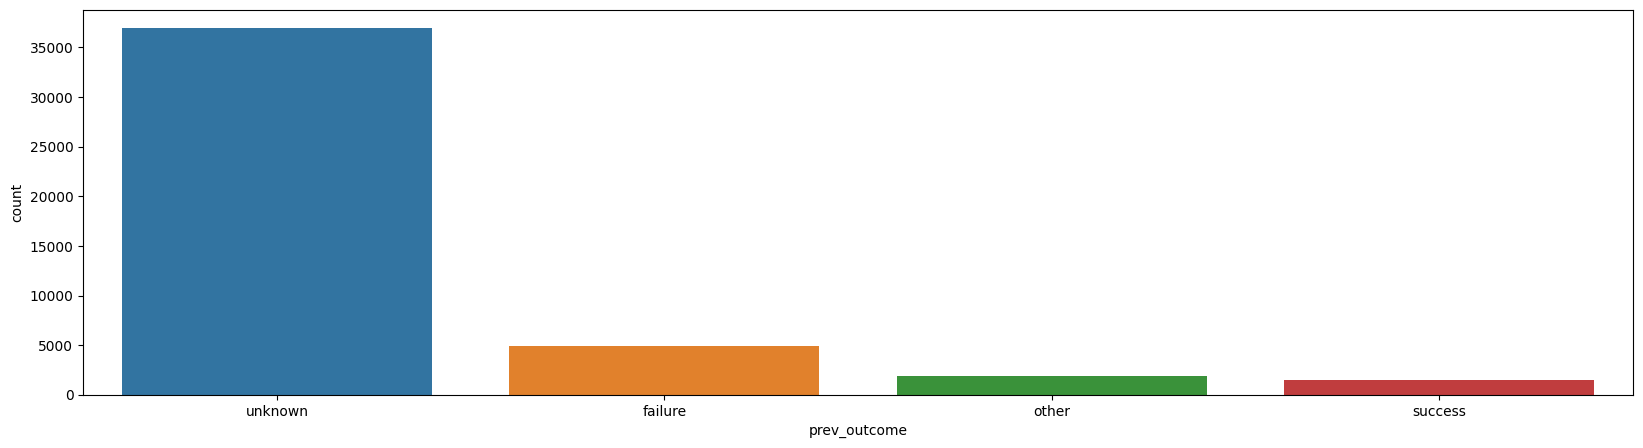

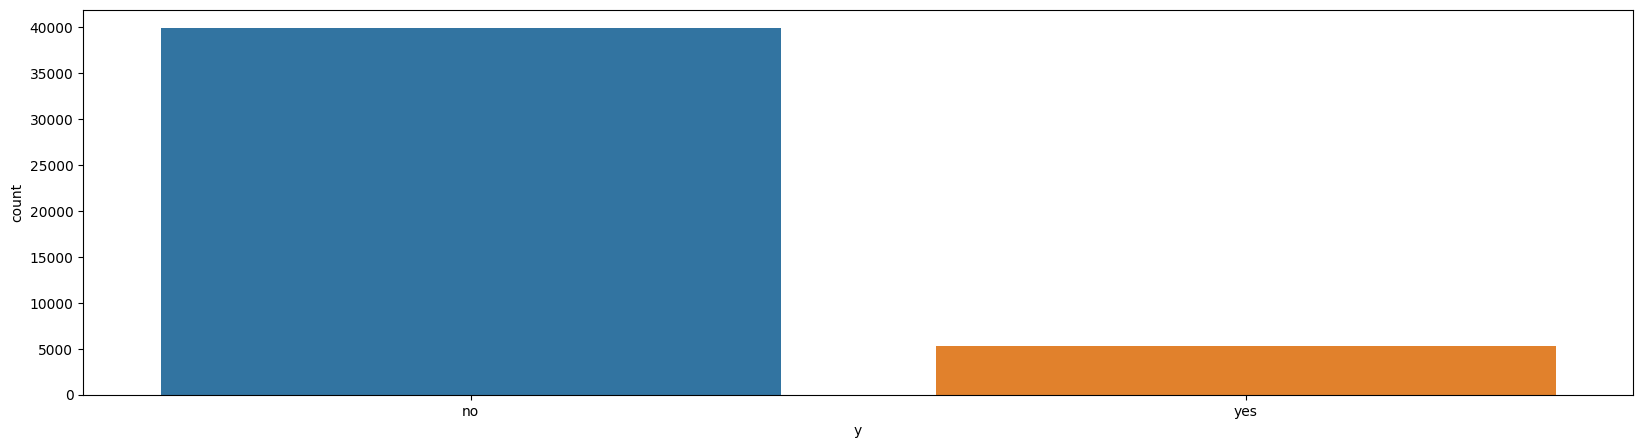

In [9]:
for i in dataset.columns:
  plt.figure(figsize = (20,5))
  sns.countplot(x=dataset[i])


<Figure size 2000x500 with 0 Axes>

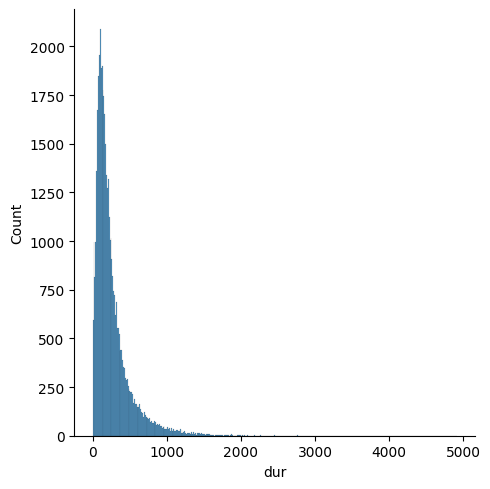

In [10]:
plt.figure(figsize=(20,5))
sns.displot(x=dataset.dur, kind='hist')

plt.show()


<Axes: xlabel='dur', ylabel='Count'>

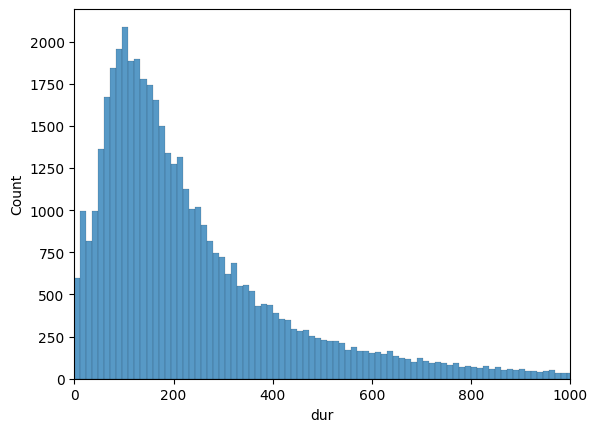

In [11]:
fig, ax = plt.subplots()

b = sns.histplot(dataset.dur, ax=ax)
ax.set_xlim(0, 1000)
b

# ANALYSIS

In [12]:
dataset.y

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

In [13]:
dataset.y.unique()

array(['no', 'yes'], dtype=object)

In [14]:
dataset.y = dataset.y.map({'no':0,'yes':1})

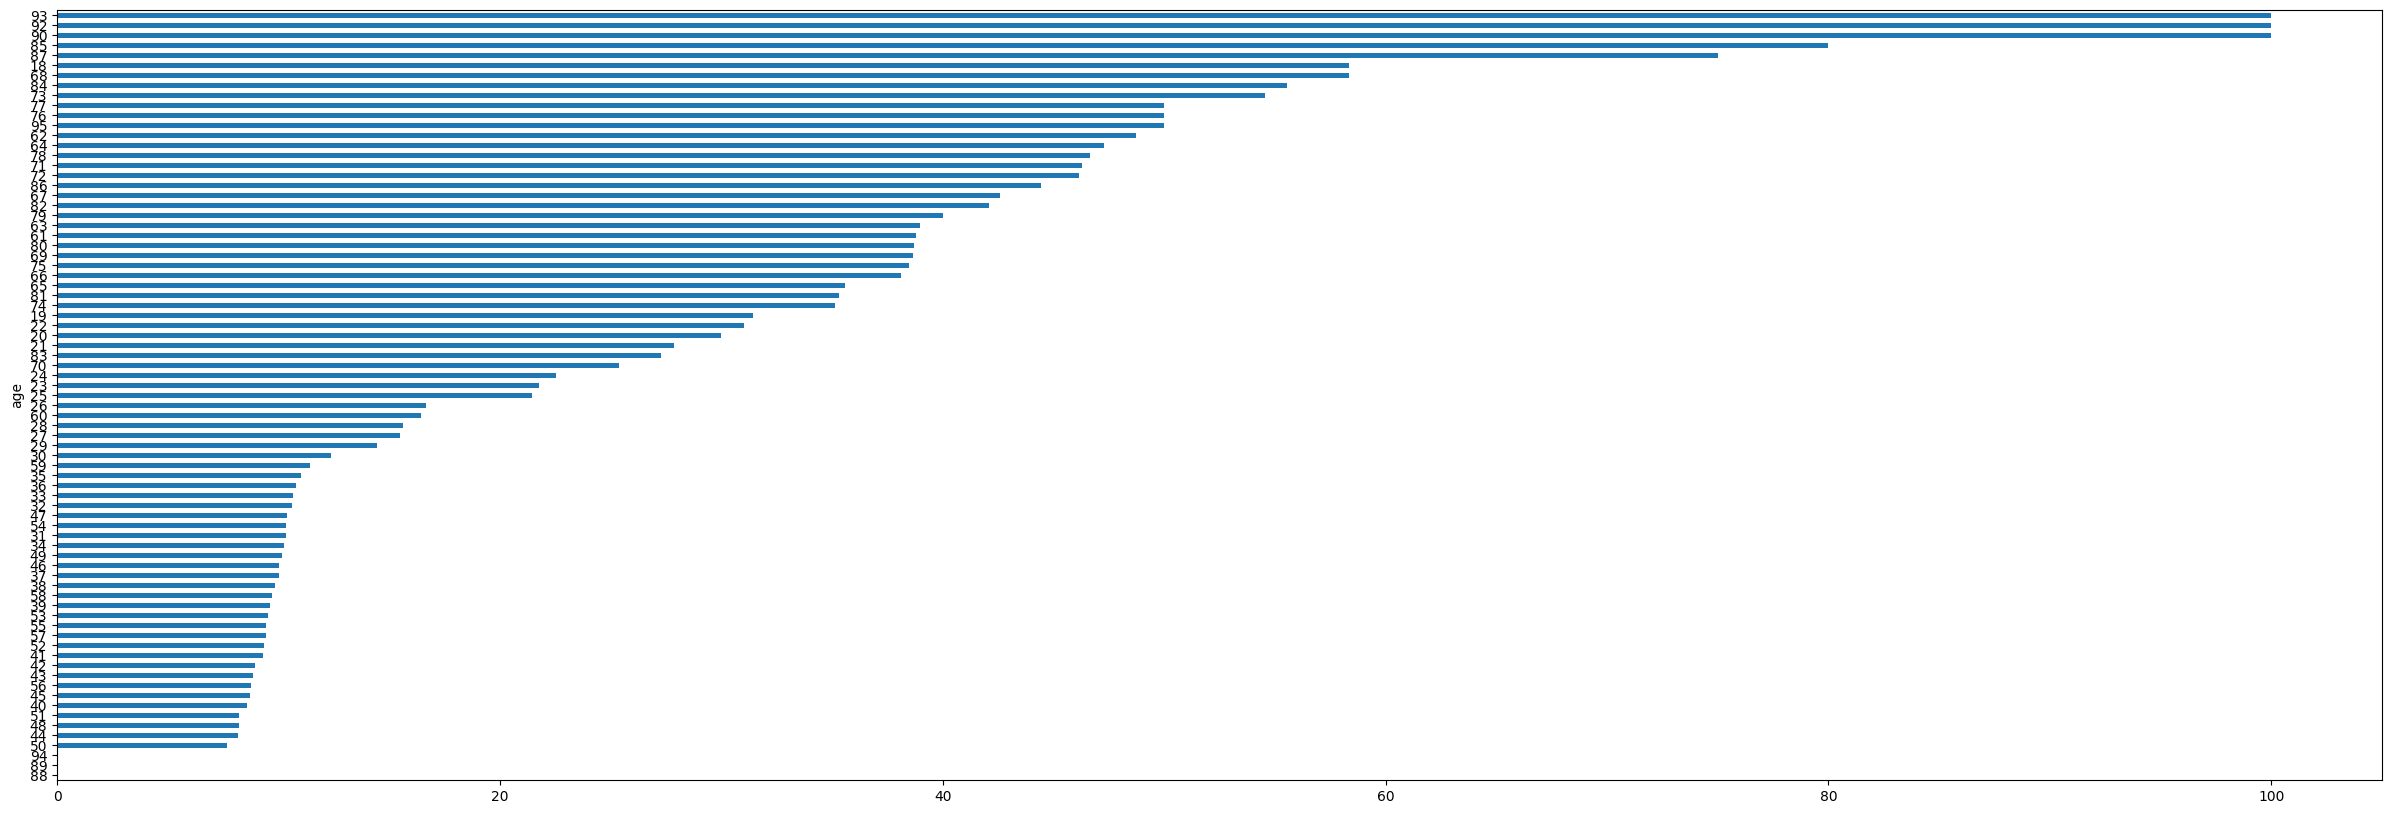

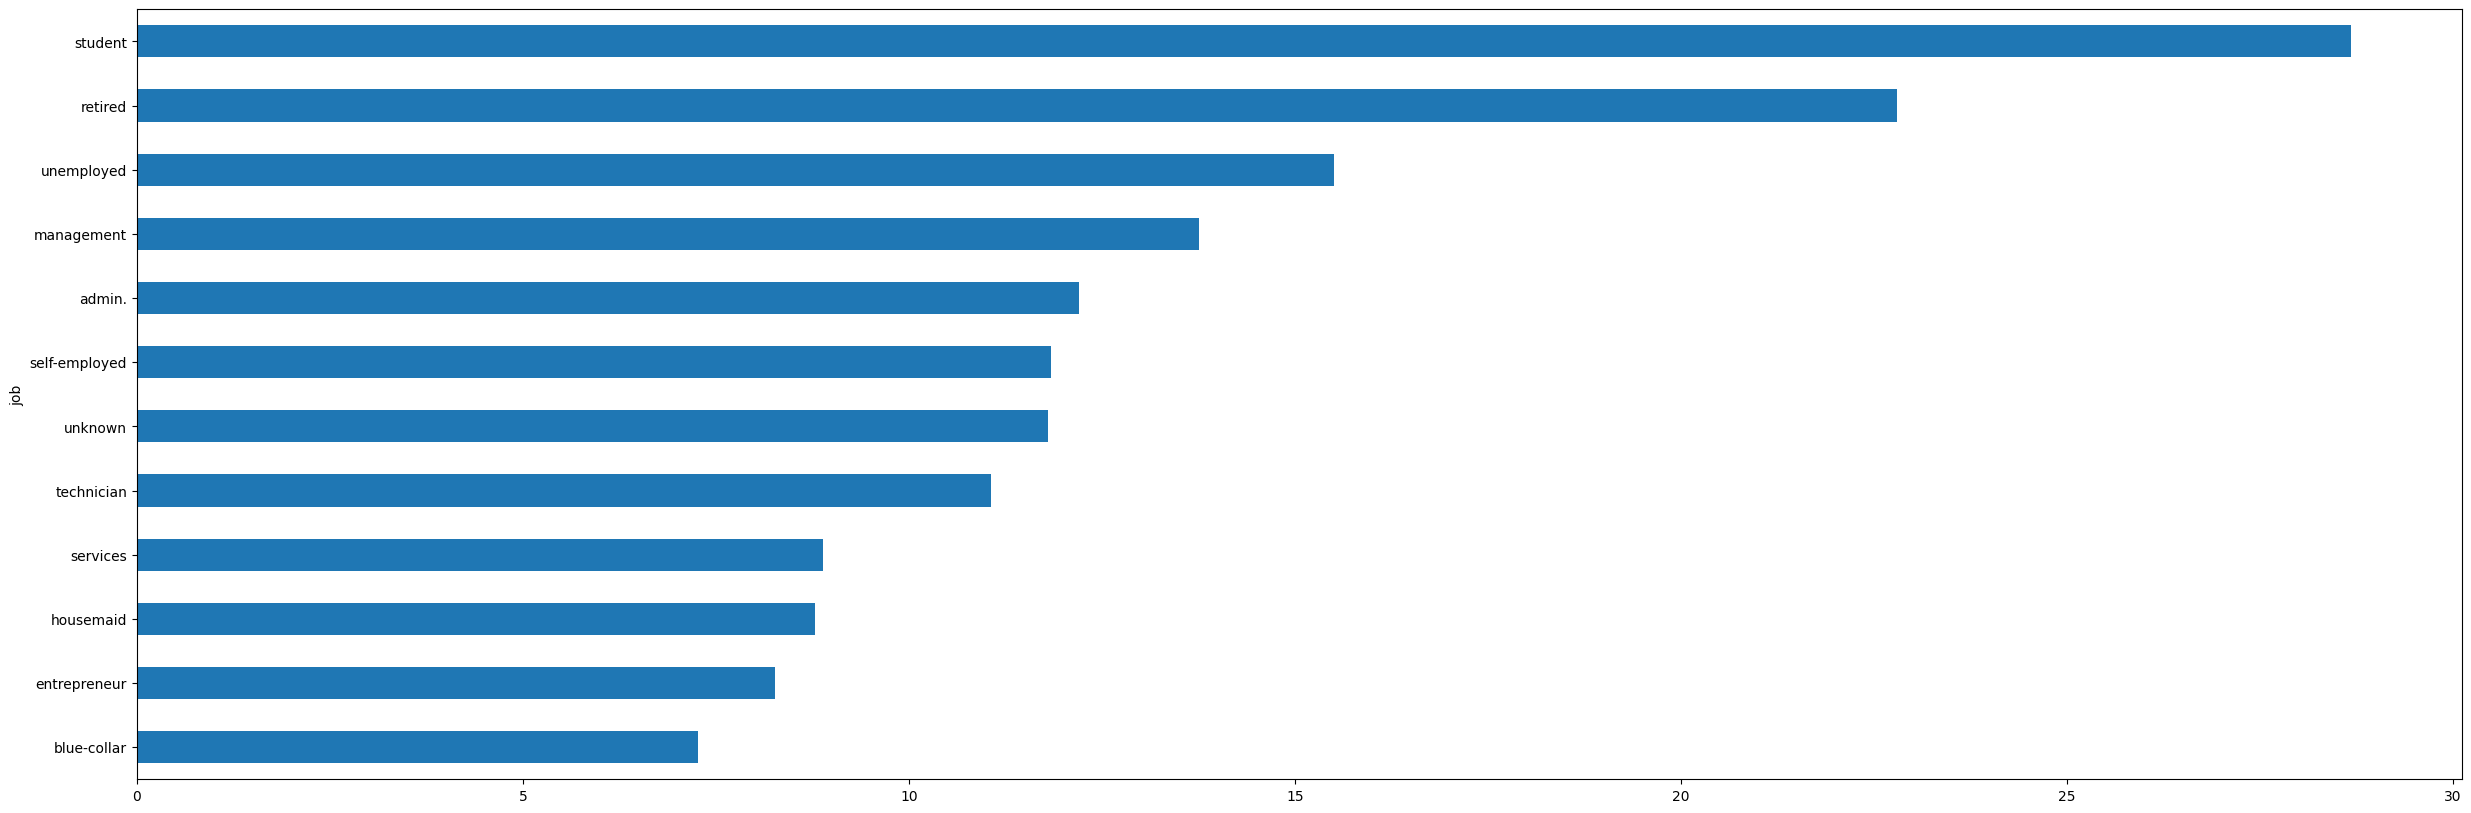

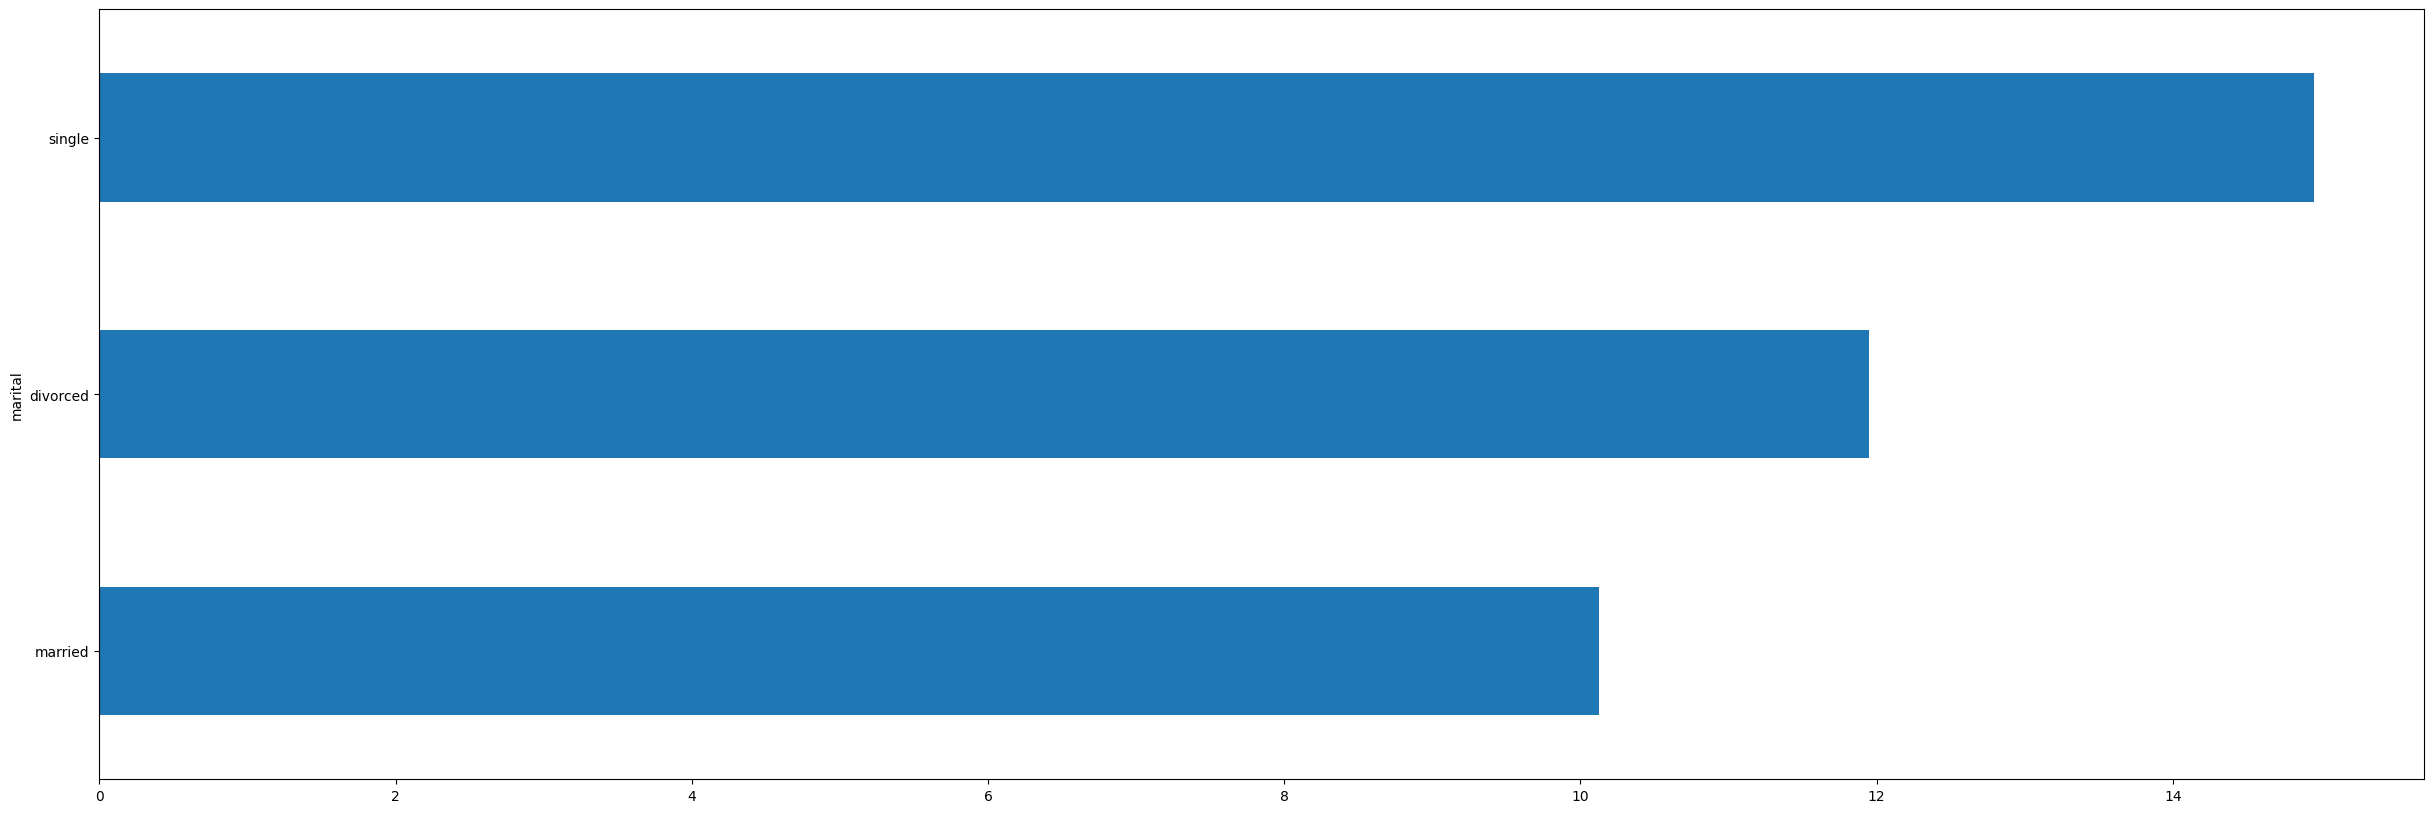

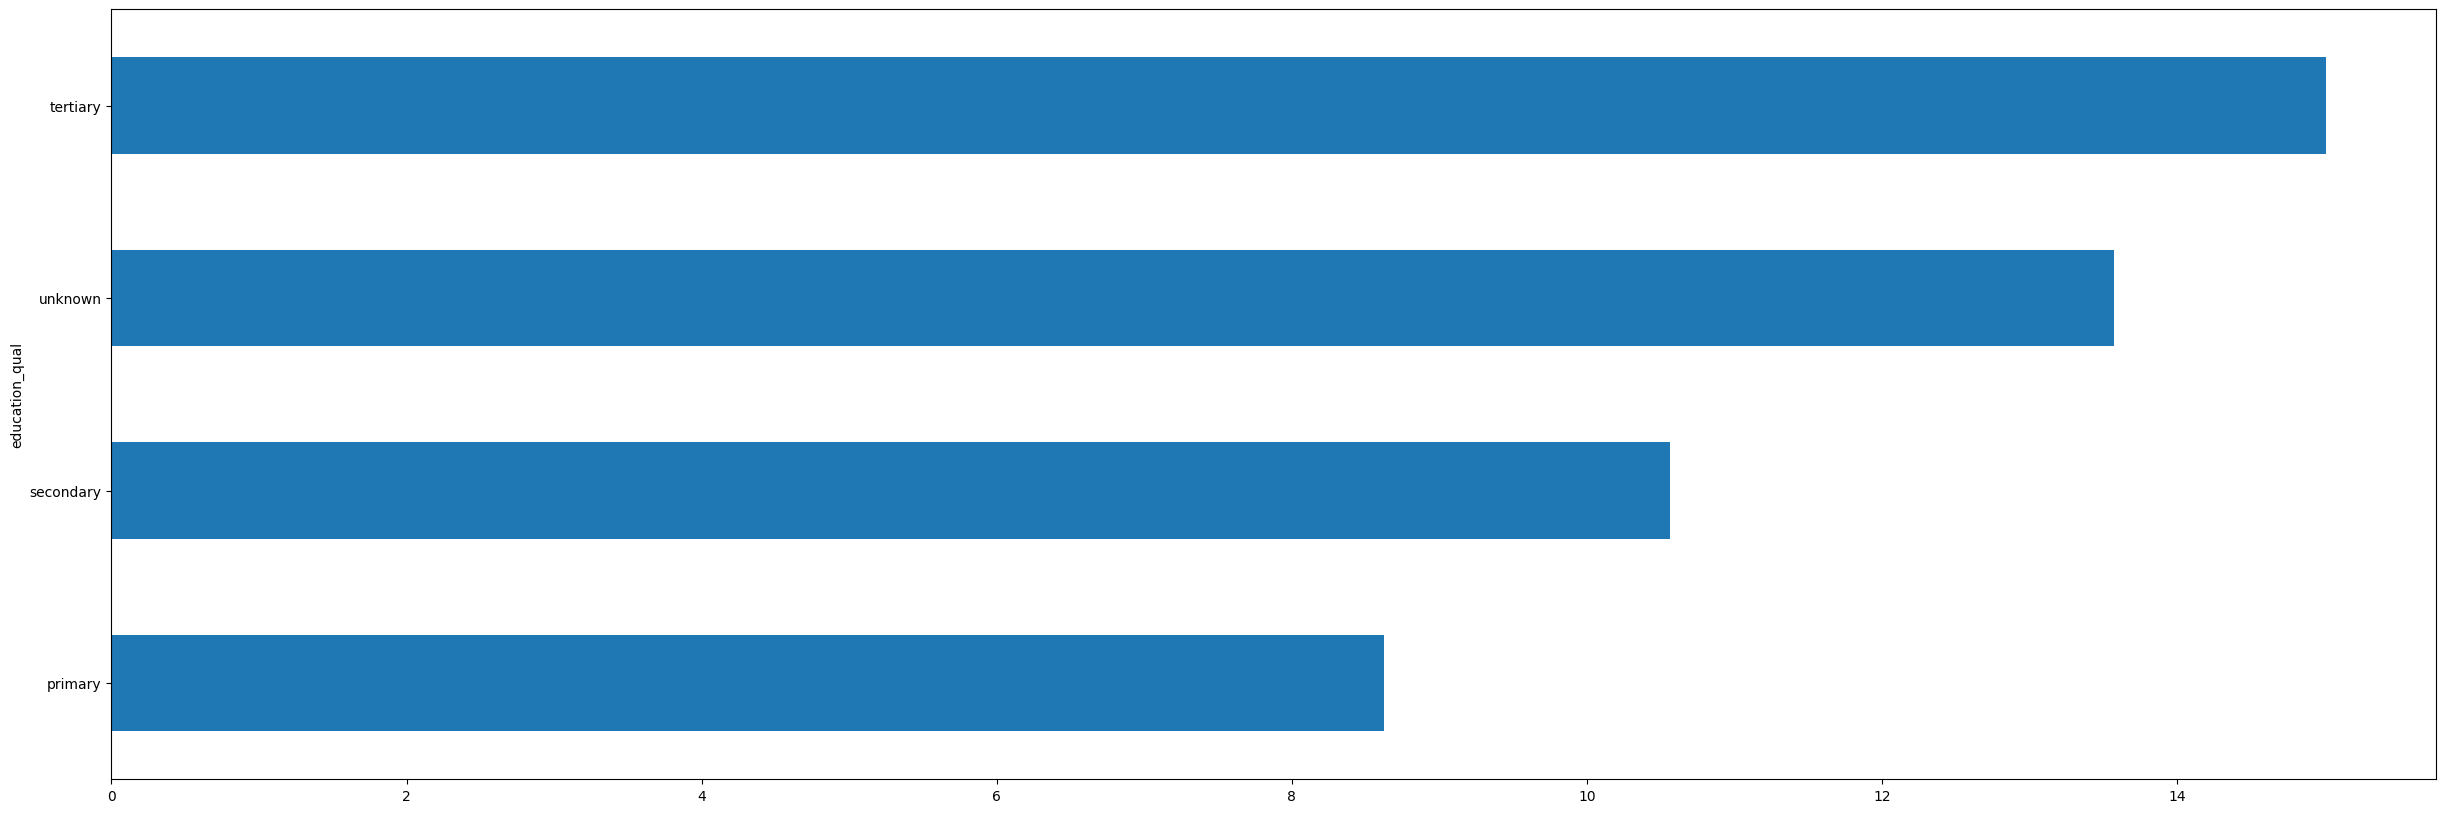

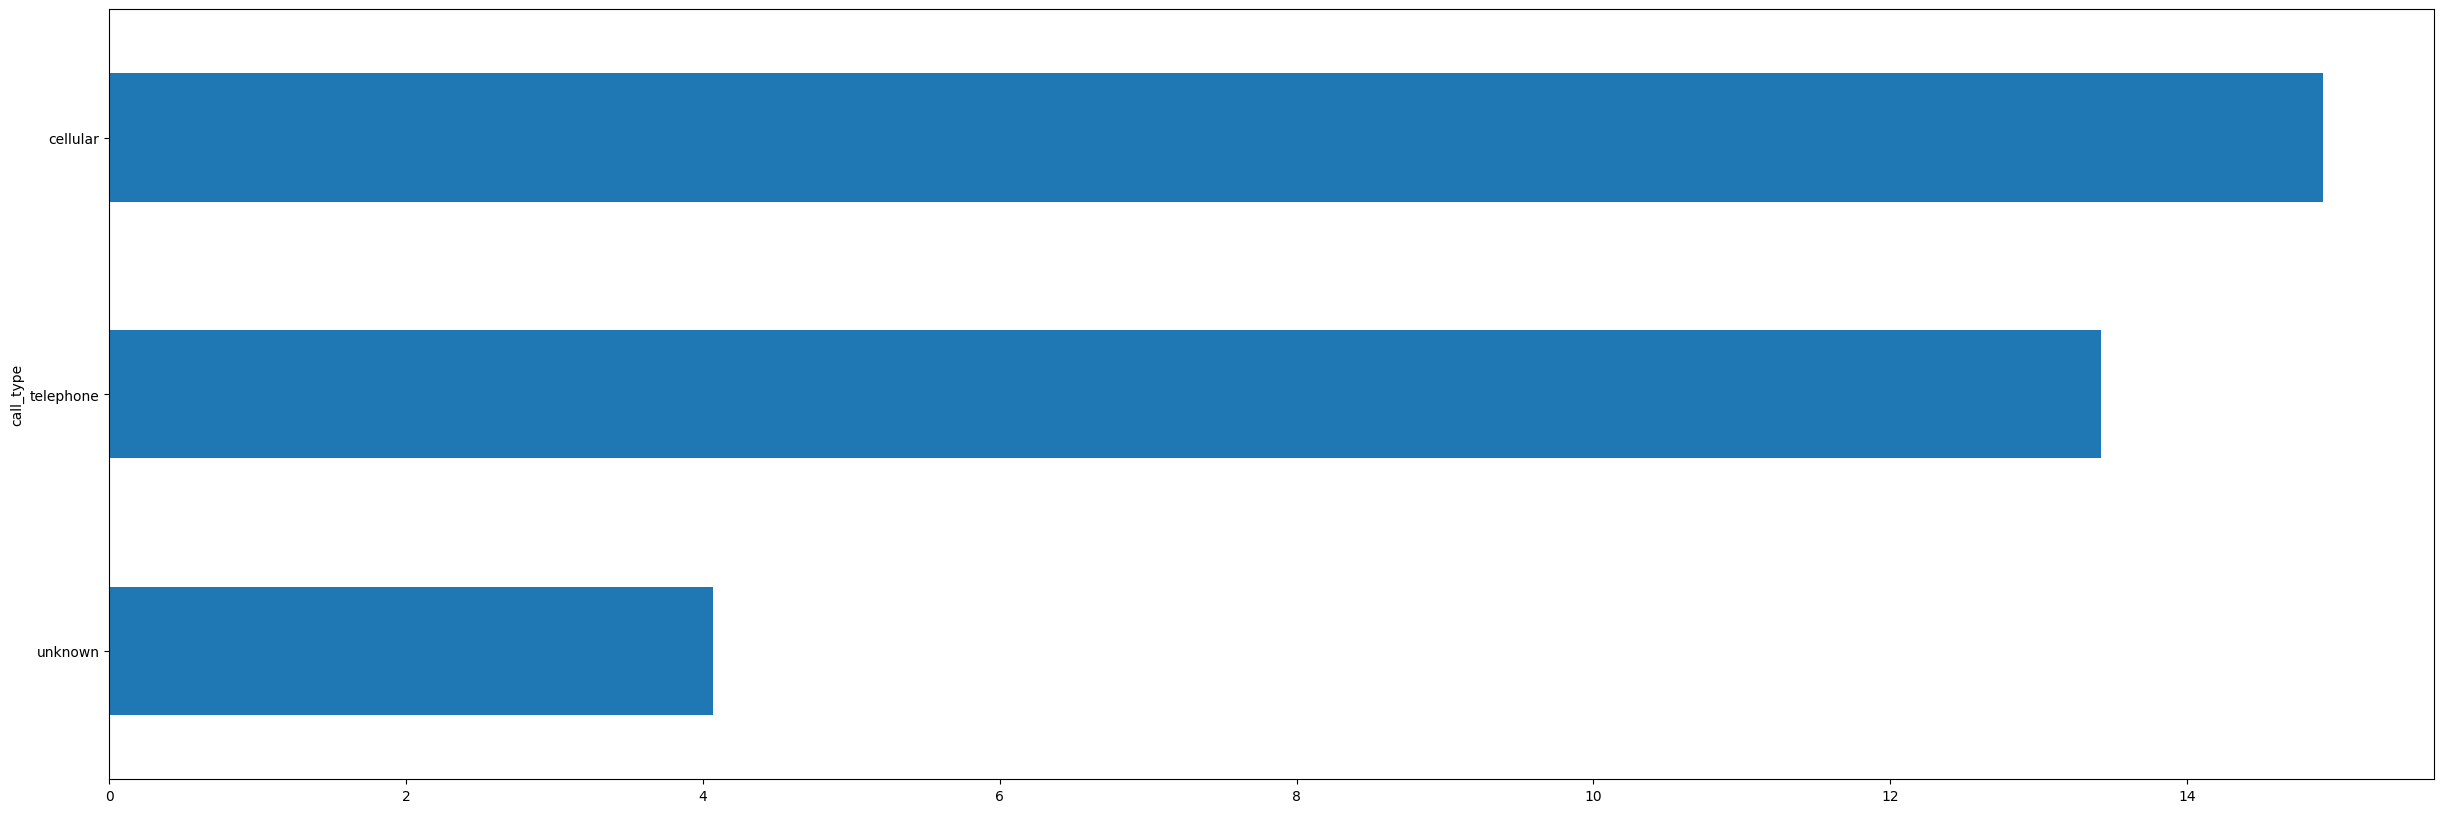

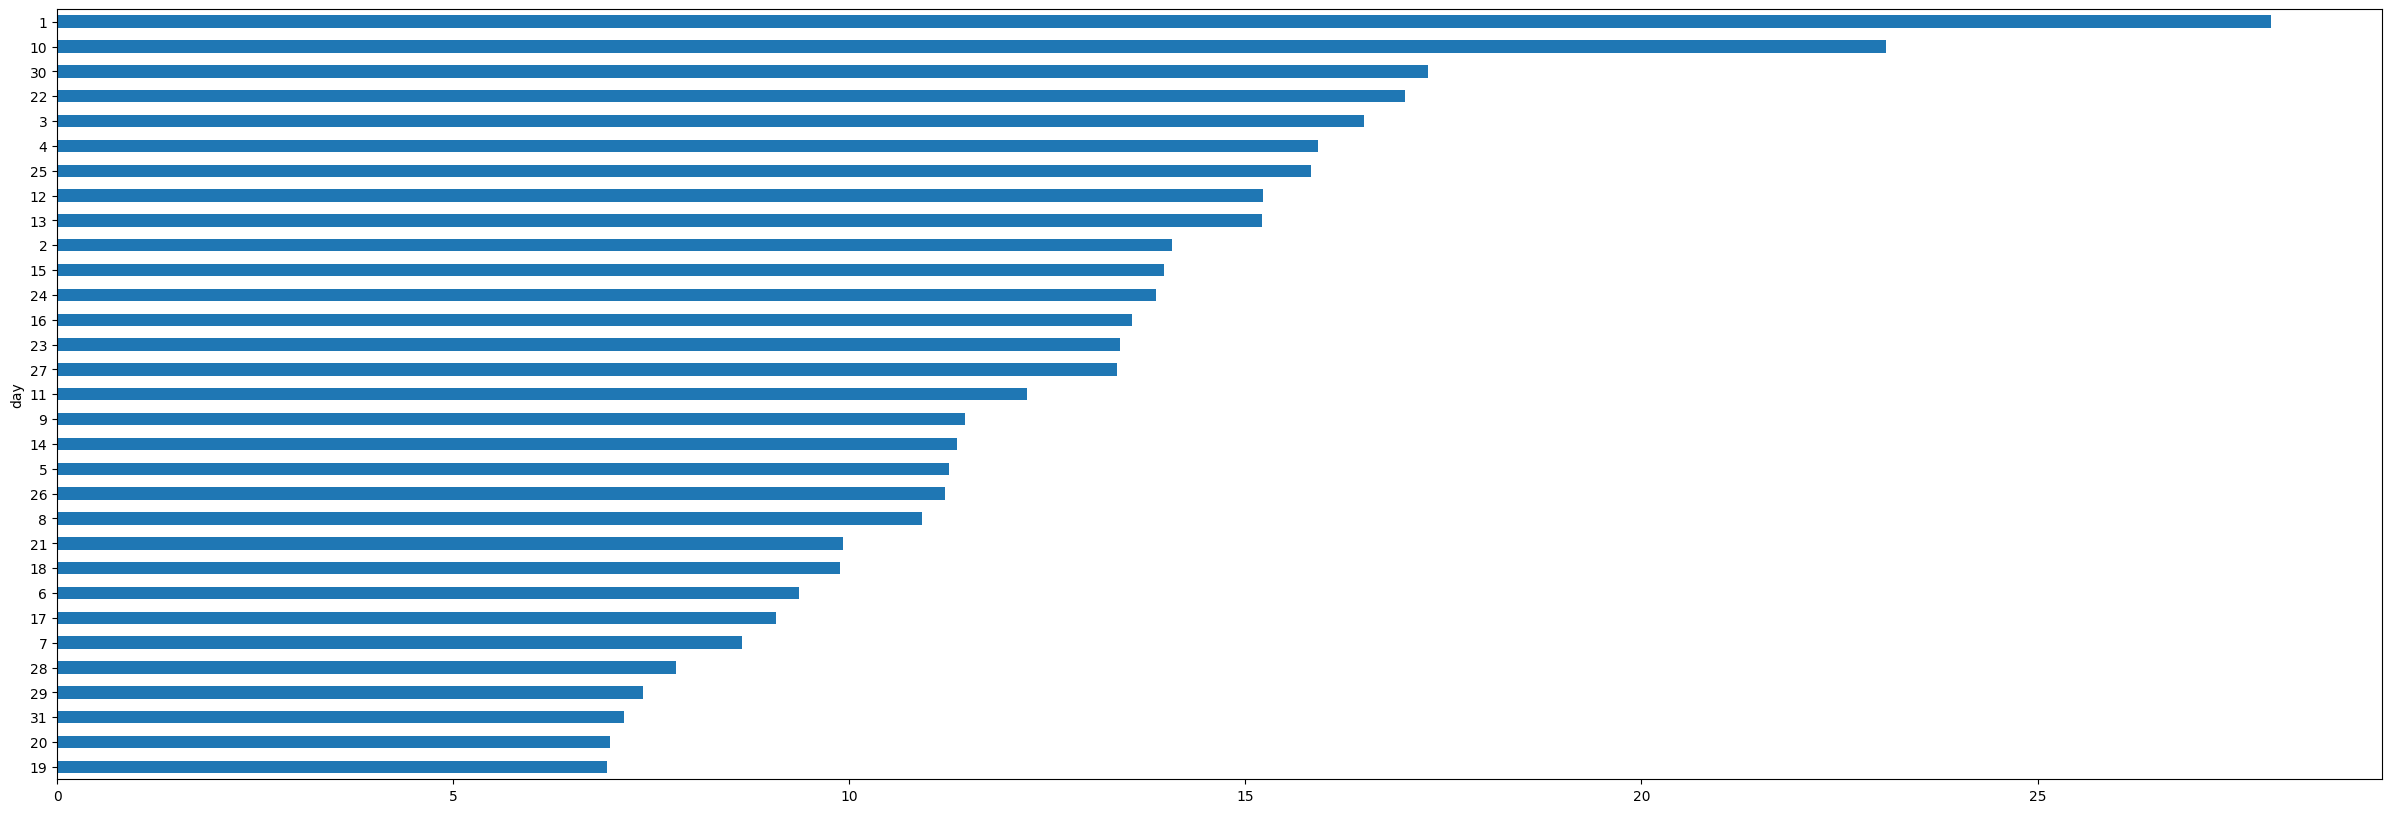

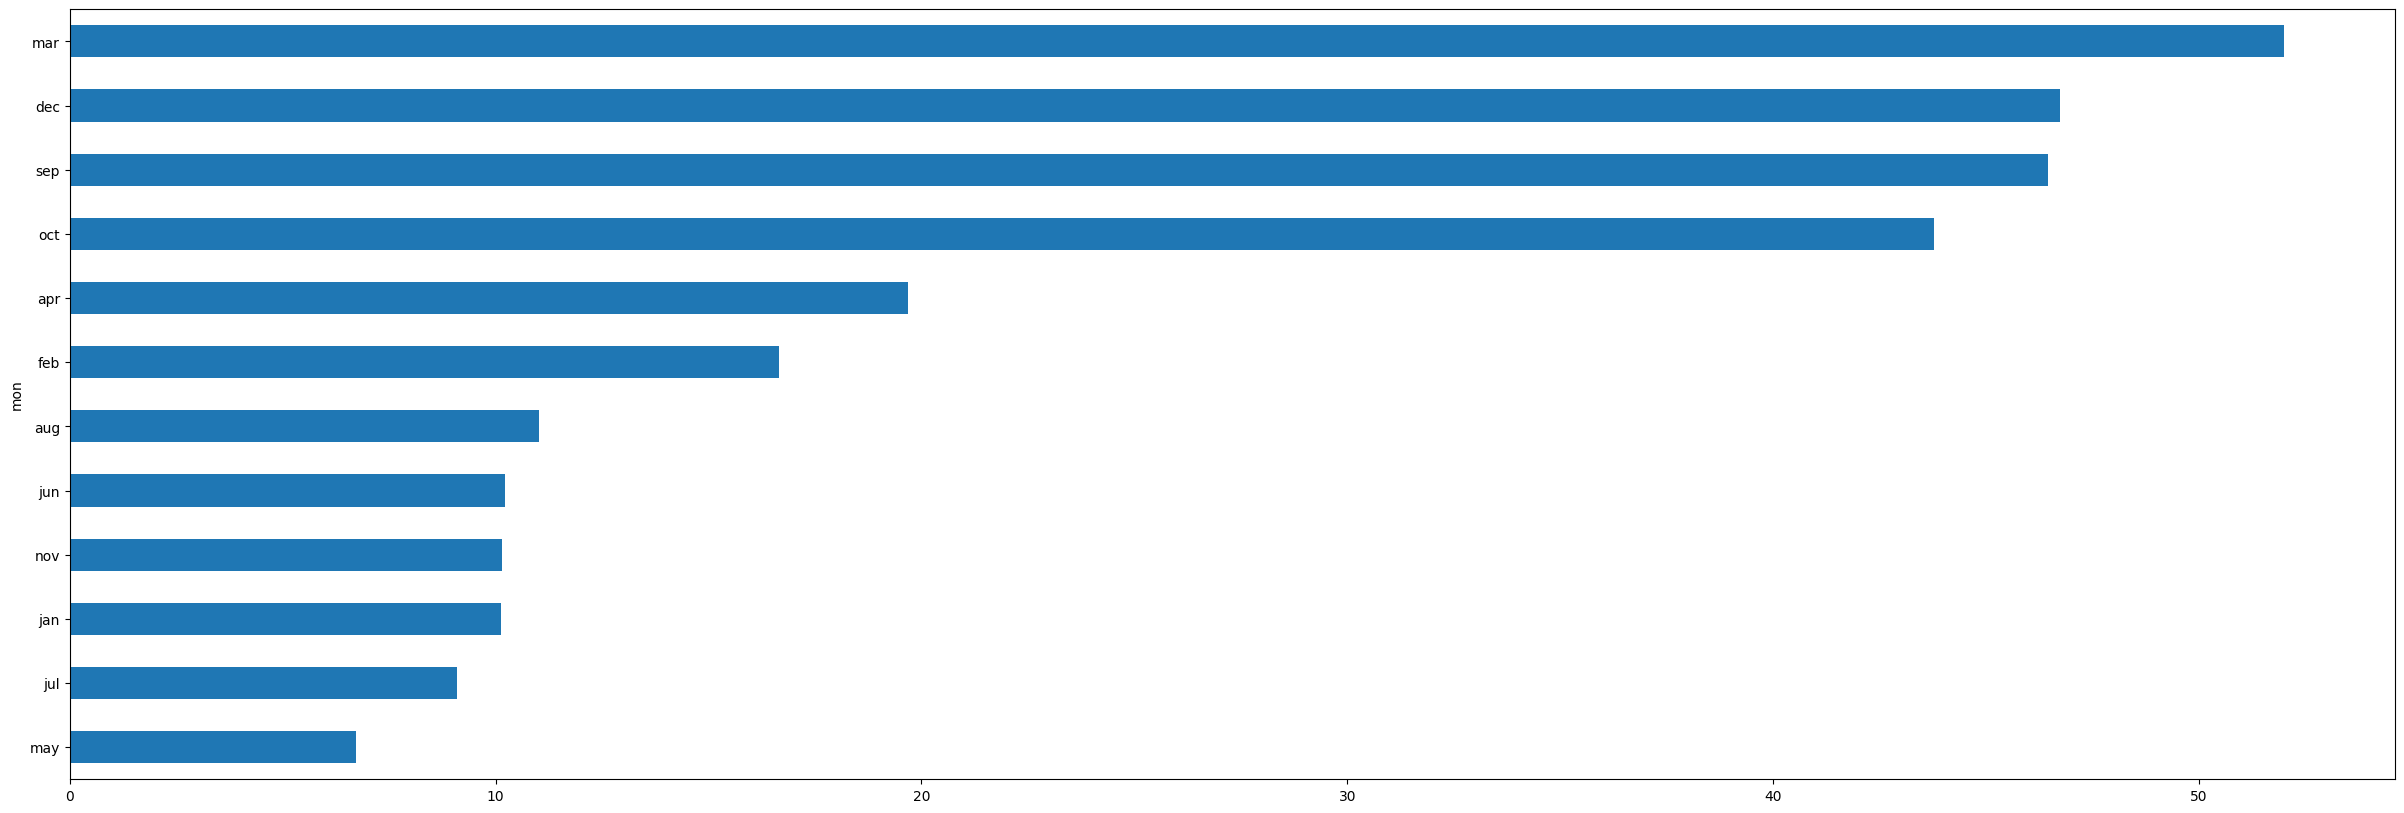

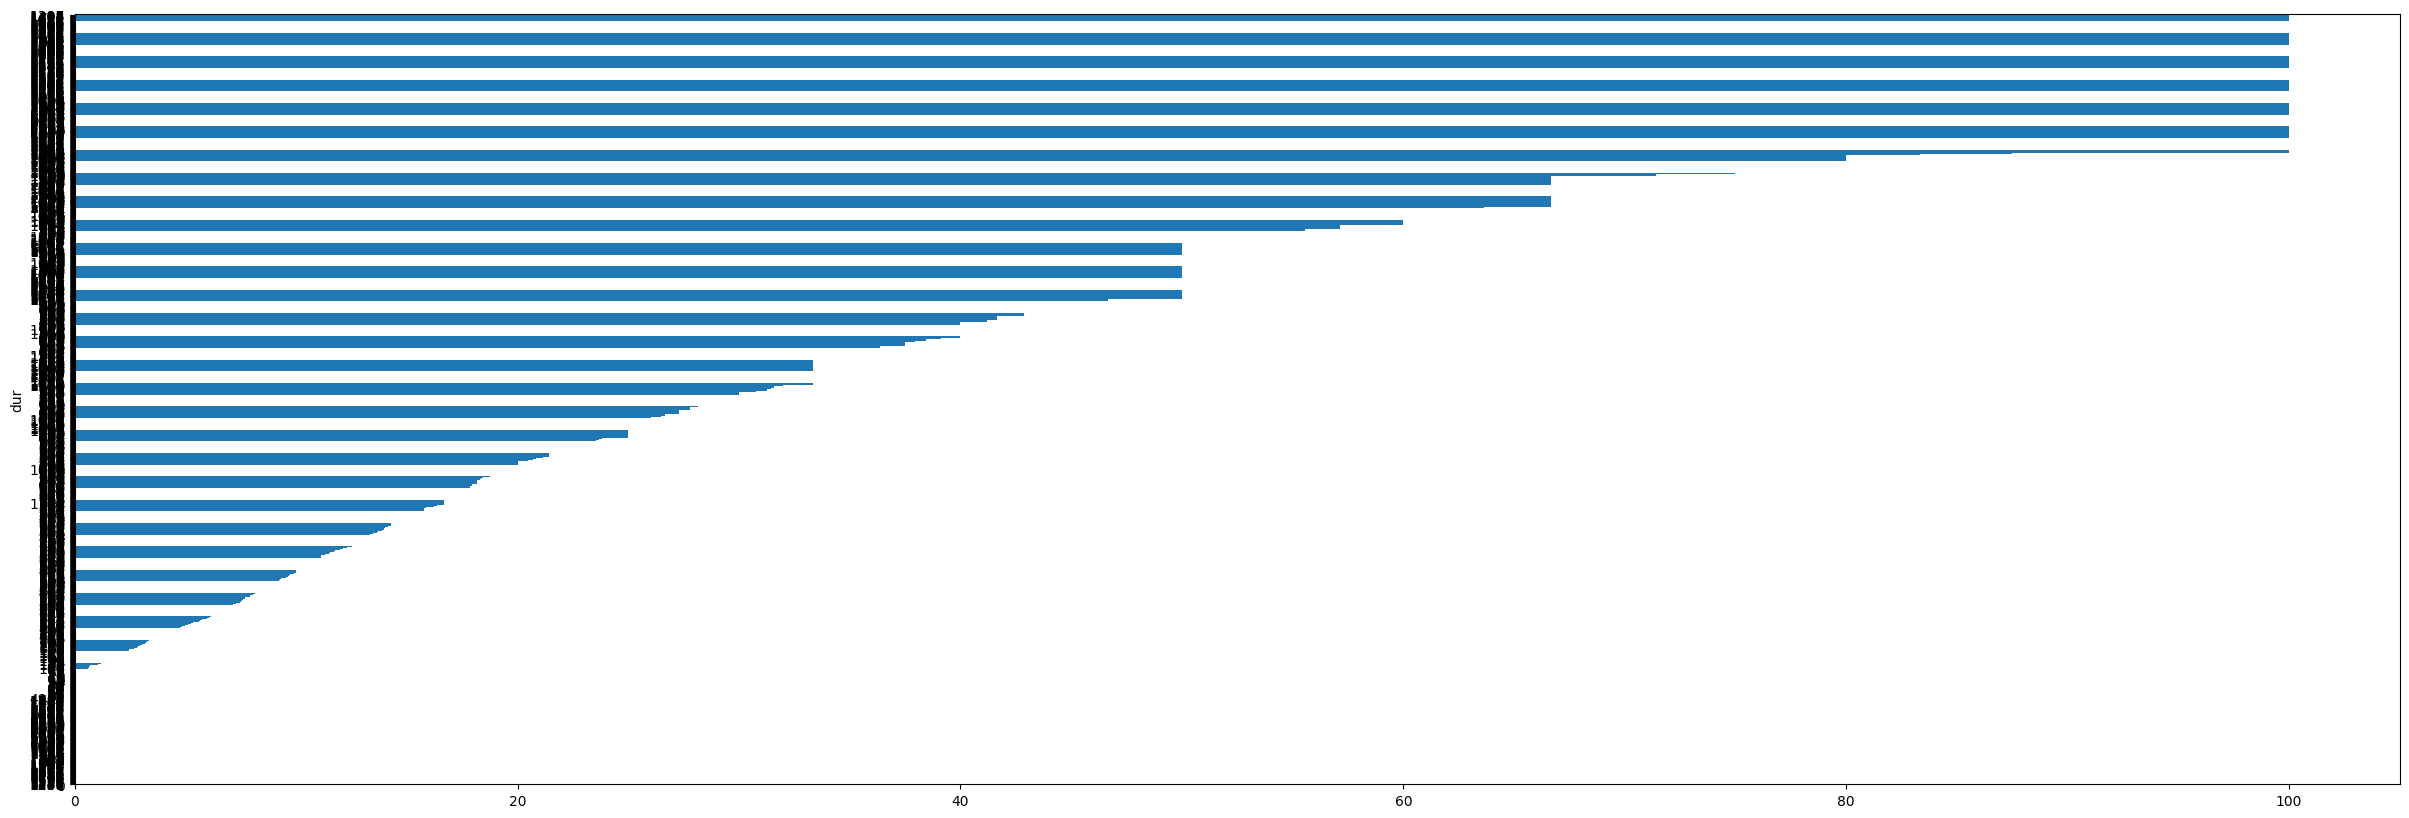

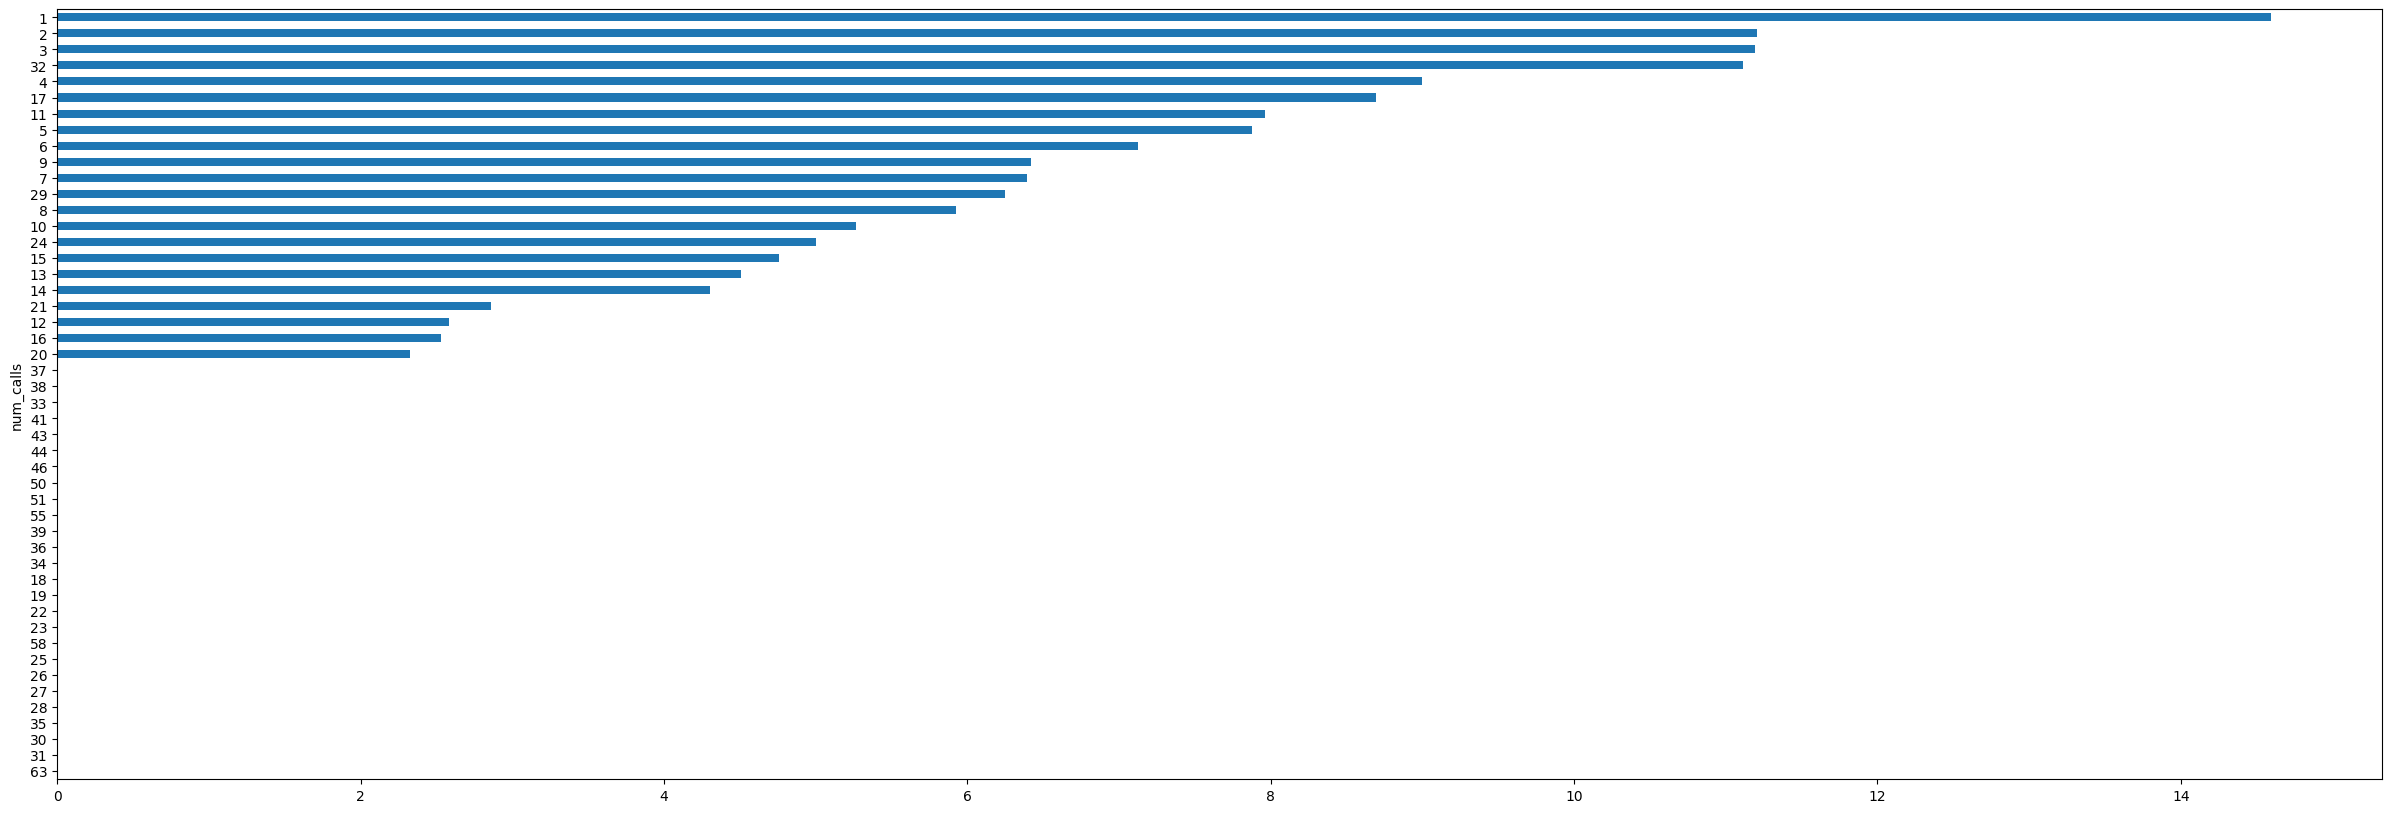

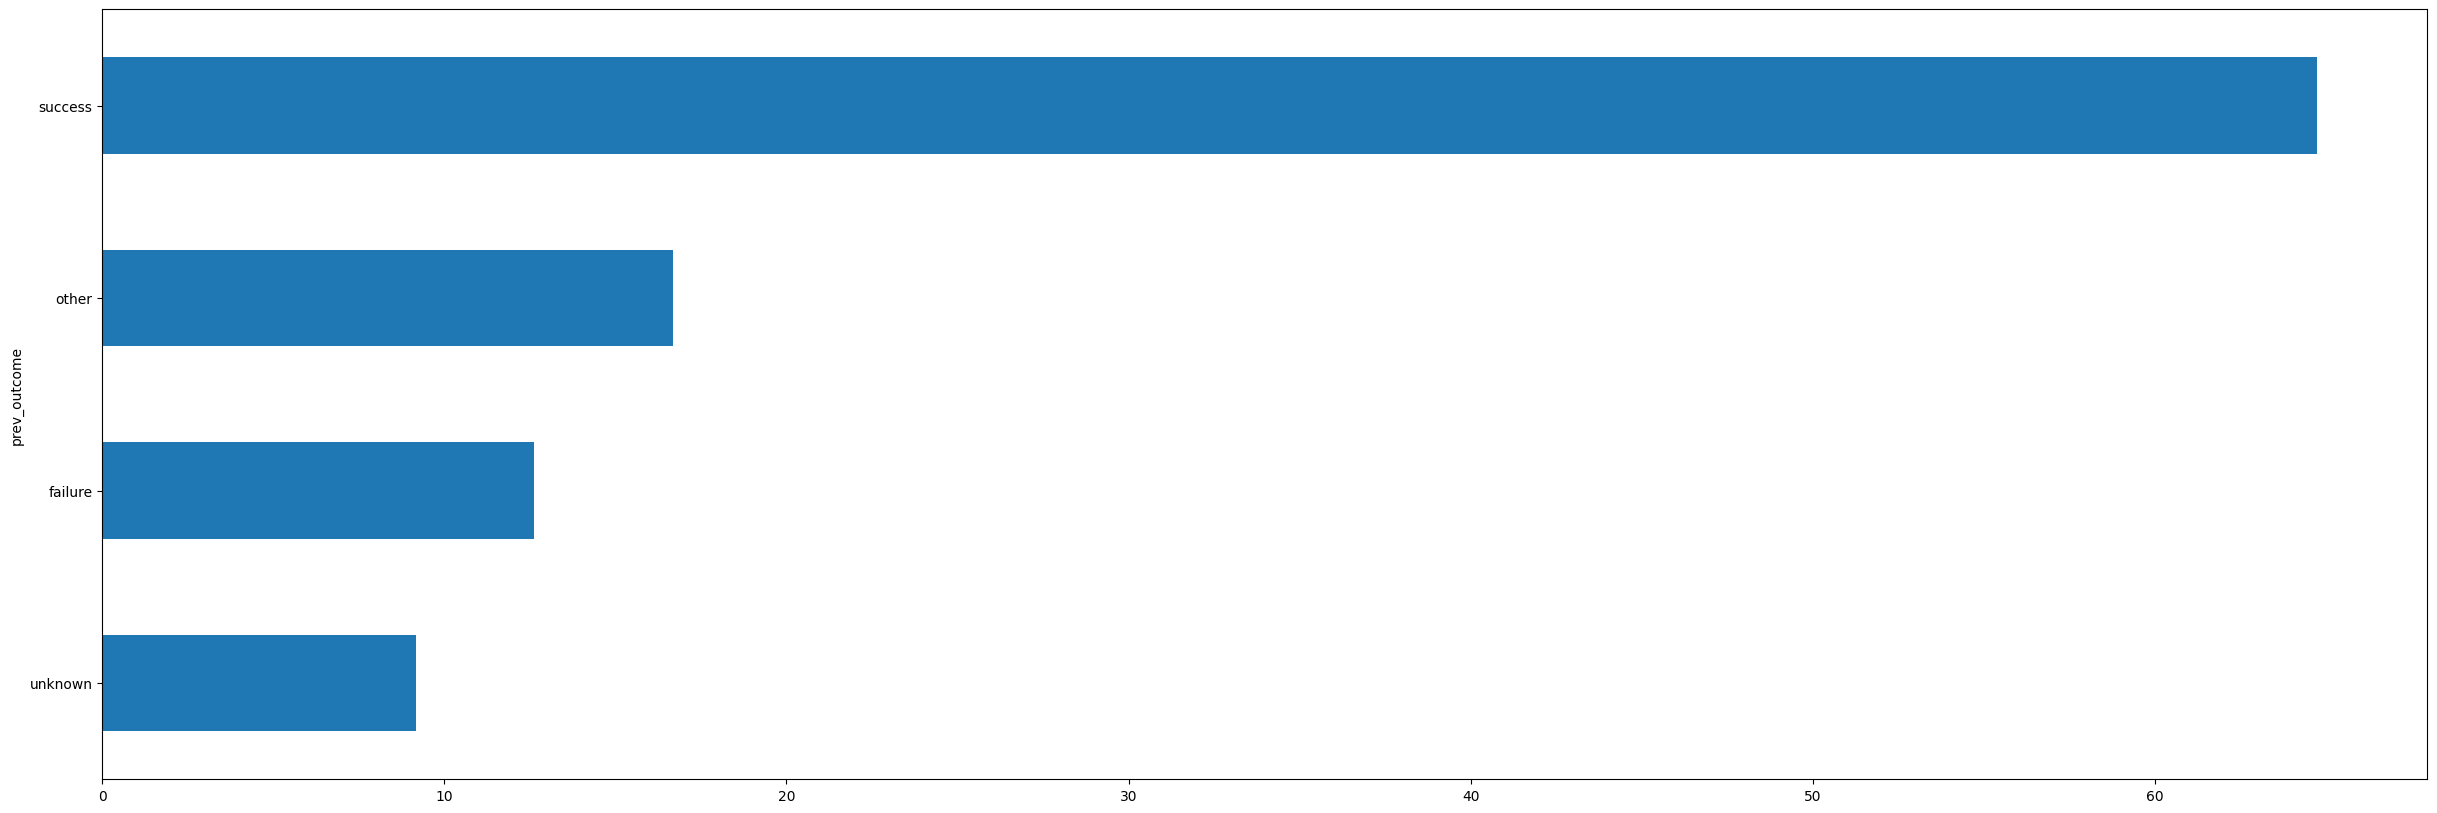

In [15]:
features = dataset.loc[:,dataset.columns[:10]]
for i in features:
  plt.figure(figsize = (30,10))
  (dataset.groupby(features[i])['y'].mean()*100).sort_values().plot(kind='barh')



# ENCODING

In [16]:
dataset.mon.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [17]:
dataset.mon = dataset.mon.map({'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11, 'dec':12, 'jan':1, 'feb':2,'mar':3, 'apr':4, 'sep':9})

In [18]:
dataset.education_qual.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [19]:
dataset.education_qual = dataset.education_qual.map({'tertiary':3, 'secondary':2, 'unknown':0, 'primary':1})

In [20]:
dataset.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [21]:
dataset.marital = dataset.marital.map({'married':24, 'single':16, 'divorced':32})

Marital column I decided to encode on the general age a person will be single, married and divorced instead of the usual 0,1 and 2.

In [22]:
dataset.call_type = dataset.call_type.map({'unknown':0, 'cellular':1, 'telephone':2})

In [23]:
dataset.dtypes

age                int64
job               object
marital            int64
education_qual     int64
call_type          int64
day                int64
mon                int64
dur                int64
num_calls          int64
prev_outcome      object
y                  int64
dtype: object

In [24]:
dataset.prev_outcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [25]:
dataset.prev_outcome = dataset.prev_outcome.map({'unknown':2, 'failure':0, 'other':3, 'success':1})

In [26]:
dataset.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
le = LabelEncoder()
t = le.fit_transform(dataset.job)
t

array([4, 9, 2, ..., 5, 1, 2])

In [29]:
dataset.job = t

In [30]:
dataset.job.unique()

array([ 4,  9,  2,  1, 11,  5,  0,  7,  6, 10,  3,  8])

In [31]:
dataset.dtypes

age               int64
job               int64
marital           int64
education_qual    int64
call_type         int64
day               int64
mon               int64
dur               int64
num_calls         int64
prev_outcome      int64
y                 int64
dtype: object

In [32]:
dataset.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [33]:
dataset.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Length: 45211, dtype: bool

#SPLITTING

In [34]:
X = dataset.loc[:,dataset.columns[:10]]
y = dataset['y']

In [35]:
X


,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome
0,58,4,24,3,0,5,5,261,1,2
1,44,9,16,2,0,5,5,151,1,2
2,33,2,24,2,0,5,5,76,1,2
3,47,1,24,0,0,5,5,92,1,2
4,33,11,16,0,0,5,5,198,1,2
...,...,...,...,...,...,...,...,...,...,...
45206,51,9,24,3,1,17,11,977,3,2
45207,71,5,32,1,1,17,11,456,2,2
45208,72,5,24,2,1,17,11,1127,5,1
45209,57,1,24,2,2,17,11,508,4,2


In [36]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 8)

Class 0: 39922
Class 1: 5289
Proportion of class 0 is  88.3 %


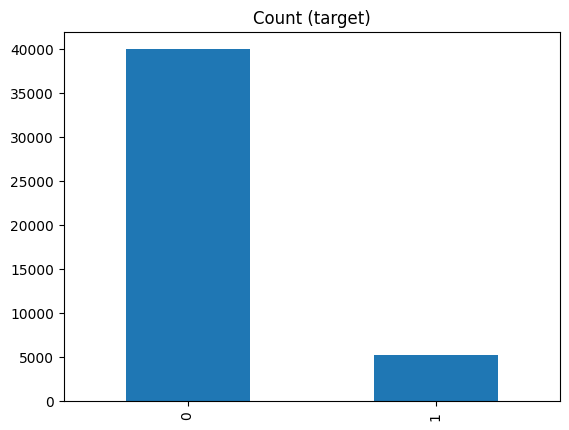

In [38]:
target_count = dataset.y.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion of class 0 is ', round(target_count[0] * 100 / (target_count[1] + target_count[0]), 2),'%')

target_count.plot(kind='bar', title='Count (target)');

Class 0: 31947
Class 1: 4221
Proportion of class 0 is  88.33 %


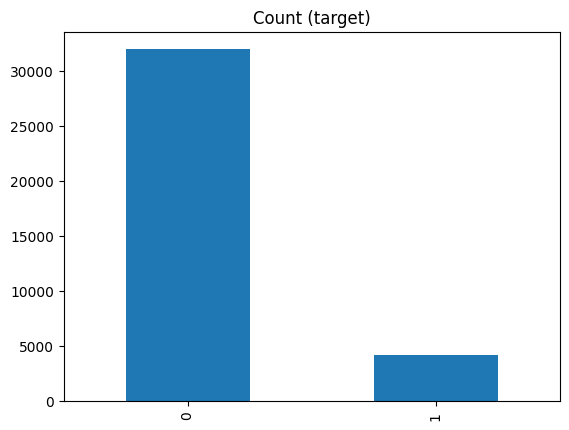

In [39]:
target_count = y_train.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion of class 0 is ', round(target_count[0] * 100 / (target_count[1] + target_count[0]), 2),'%')

target_count.plot(kind='bar', title='Count (target)');

# BALANCING THE DATA



In [40]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


BALANCING using SMOTE

In [41]:
from imblearn.over_sampling import SMOTE

In [42]:
smote = SMOTE(sampling_strategy = 'minority')
X_smote , y_smote = smote.fit_resample(X_train,y_train)

Class 0: 31947
Class 1: 31947
Proportion of class 0 is  50.0 %


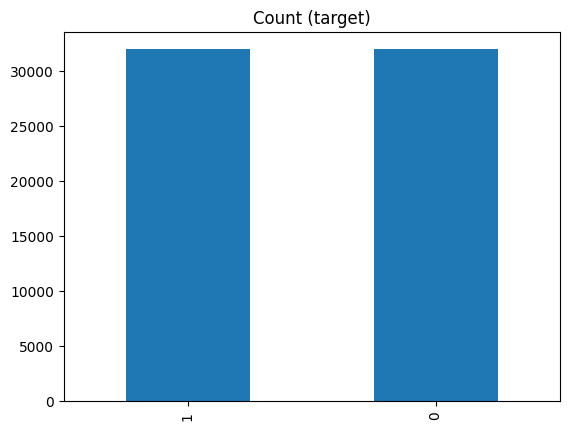

In [43]:
target_count = y_smote.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion of class 0 is ', round(target_count[0] * 100 / (target_count[1] + target_count[0]), 2),'%')

target_count.plot(kind='bar', title='Count (target)');

In [44]:
from imblearn.combine import SMOTETomek

smtmk = SMOTETomek(sampling_strategy = 'minority')
X_smtmk , y_smtmk = smtmk.fit_resample(X_train,y_train)


Class 0: 31735
Class 1: 31735
Proportion of class 0 is  50.0 %


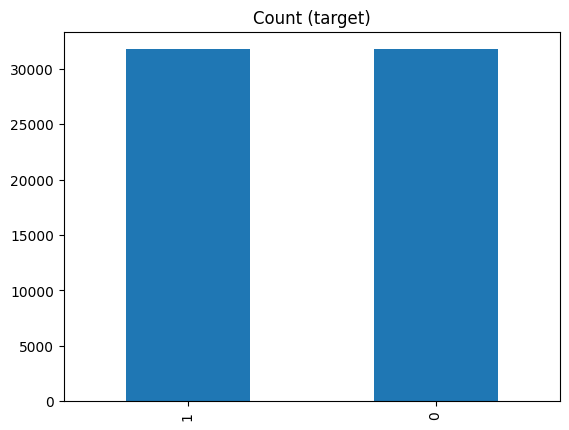

In [45]:
target_count = y_smtmk.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion of class 0 is ', round(target_count[0] * 100 / (target_count[1] + target_count[0]), 2),'%')

target_count.plot(kind='bar', title='Count (target)');

In [46]:
from imblearn.combine import SMOTEENN

smtenn = SMOTEENN(sampling_strategy = 'minority')
X_smtenn , y_smtenn = smtenn.fit_resample(X_train,y_train)


Class 0: 23136
Class 1: 30158
Proportion of class 0 is  43.41 %


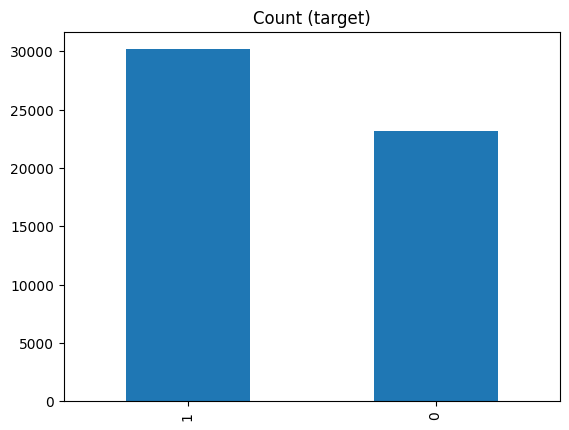

In [47]:
target_count = y_smtenn.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion of class 0 is ', round(target_count[0] * 100 / (target_count[1] + target_count[0]), 2),'%')

target_count.plot(kind='bar', title='Count (target)');

#MODELLING

# 1. LOGISTIC REGRESSION

In [48]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_smote,y_smote)
y_pred_lr_1 = lr.predict(X_test)

y_pred_lr_1

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, ..., 0, 0, 0])

In [49]:
from sklearn.metrics import f1_score, roc_auc_score


In [50]:
f1_lr1 = f1_score(y_test,y_pred_lr_1)
f1_lr1

0.42173274596182087

In [51]:
pred_probs_lr1= lr.predict_proba(X_test)
auc_score_lr1 = roc_auc_score(y_test, pred_probs_lr1[:,1])
auc_score_lr1

0.8215475561504233

The AUROC score was good , But the F1 score was poor. Even though the evauation metric for the problem was AUROC, based on the domain F1 score will be the important metric so as to reduce the false negatives. Hence, I wanted to give an overall good and reliable model.

I decided to go with the top most models present - Random Forest and XGBoost.

# 2. RANDOM FOREST

Random forest with SMOTE dataset

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_smote,y_smote)

y_pred_rf1 = rf.predict(X_test)
y_pred_rf1

array([0, 0, 0, ..., 0, 0, 0])

In [53]:
f1_rf1 = f1_score(y_test,y_pred_rf1)
f1_rf1

0.5722567287784679

In [54]:
pred_probs_rf1= rf.predict_proba(X_test)
auc_score_rf1 = roc_auc_score(y_test, pred_probs_rf1[:,1])
auc_score_rf1

0.9112465804891221

Random forest with SMOTE-Tomek dataset

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_smtmk,y_smtmk)

y_pred_rf2 = rf.predict(X_test)
y_pred_rf2

array([0, 0, 0, ..., 0, 0, 0])

In [56]:
f1_rf2 = f1_score(y_test,y_pred_rf2)
f1_rf2

0.5664221678891606

In [57]:
pred_probs_rf2= rf.predict_proba(X_test)

In [58]:
auc_score_rf2 = roc_auc_score(y_test, pred_probs_rf2[:,1])
auc_score_rf2

0.915045613046388

Random forest with SMOTE-ENN dataset

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_smtenn,y_smtenn)

y_pred_rf3 = rf.predict(X_test)
y_pred_rf3

array([0, 1, 0, ..., 0, 0, 0])

In [60]:
f1_rf3= f1_score(y_test,y_pred_rf3)
f1_rf3

0.5510597302504817

In [61]:
pred_probs_rf3= rf.predict_proba(X_test)

In [62]:
auc_score_rf3 = roc_auc_score(y_test, pred_probs_rf3[:,1])
auc_score_rf3

0.9059849952449719

The model performance was better , but still I wanted to build a better model. That's when in a session conducted by GUVI, Professor Sanatan Sukhija spoke about the PYCARET - the low code machine learning library.
It automatically compares the models and also tunes the hyperparamters of the model.

The Notebook in which I compared and tuned the models using PYCARET is given in the repository.

# 3. XGBOOST

First we will fit xgboost by default parameters(i.e without tuning)

XGBoost with SMOTE dataset

In [63]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_smote,y_smote)

y_pred_xgb1 = xgb.predict(X_test)
y_pred_xgb1

array([0, 1, 0, ..., 0, 0, 0])

In [64]:
f1_xgb1= f1_score(y_test,y_pred_xgb1)

In [65]:
pred_probs_xgb1= xgb.predict_proba(X_test)
auc_score_xgb1 = roc_auc_score(y_test, pred_probs_xgb1[:,1])
auc_score_xgb1


0.9130104610616039

XGBoost with SMOTE-Tomek dataset

In [66]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_smtmk,y_smtmk)

y_pred_xgb2 = xgb.predict(X_test)
print(y_pred_xgb2)

f1_xgb2 = f1_score(y_test,y_pred_xgb2)
print('F1 Score : ',f1_xgb2 )

pred_probs_xgb2= xgb.predict_proba(X_test)
auc_score_xgb2 = roc_auc_score(y_test, pred_probs_xgb2[:,1])
print('ROC AUC score : ',auc_score_xgb2 )


[0 1 0 ... 0 0 0]
F1 Score :  0.5879099170288424
ROC AUC score :  0.9123266762941308


XGBoost with SMOTE-ENN dataset

In [67]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_smtenn,y_smtenn)

y_pred_xgb3 = xgb.predict(X_test)
print(y_pred_xgb3)

f1_xgb3 = f1_score(y_test,y_pred_xgb3)
print('F1 Score : ', f1_xgb3)

pred_probs_xgb3= xgb.predict_proba(X_test)
auc_score_xgb3= roc_auc_score(y_test, pred_probs_xgb3[:,1])
print('ROC AUC score : ',auc_score_xgb3 )


[0 1 0 ... 0 0 0]
F1 Score :  0.5655790147152912
ROC AUC score :  0.91007895694645


From the above inferences, the SMOTE-ENN dataset is performing poor. Hence I decided to remove it for further modelling.

XGBoost with tuning

Tuned XGBoost with SMOTE dataset

In [68]:
from xgboost import XGBClassifier
xgb = XGBClassifier(colsample_bytree=0.7,learning_rate=0.4,max_depth=8,min_child_weight=3,n_estimators=50)
xgb.fit(X_smote,y_smote)

y_pred_xgbtuned1 = xgb.predict(X_test)
y_pred_xgbtuned1

array([0, 1, 0, ..., 0, 0, 0])

In [69]:
f1_xgbtuned1 = f1_score(y_test,y_pred_xgbtuned1)
f1_xgbtuned1

0.5782939527432919

In [70]:
pred_probs_xgbtuned1= xgb.predict_proba(X_test)
auc_score_xgbtuned1 = roc_auc_score(y_test, pred_probs_xgbtuned1[:,1])
auc_score_xgbtuned1


0.9104597701149427

Tuned XGBoost with SMOTE-Tomek Dataset

In [71]:
from xgboost import XGBClassifier
xgb = XGBClassifier(colsample_bytree=0.7,learning_rate=0.4,max_depth=8,min_child_weight=3,n_estimators=50)
xgb.fit(X_smtmk,y_smtmk)

y_pred_xgbtuned2 = xgb.predict(X_test)
print(y_pred_xgbtuned2)

f1_xgbtuned2 = f1_score(y_test,y_pred_xgbtuned2)
print('F1 Score : ', f1_xgbtuned2)

pred_probs_xgbtuned2= xgb.predict_proba(X_test)
auc_score_xgbtuned2 = roc_auc_score(y_test, pred_probs_xgbtuned2[:,1])
print('ROC AUC score : ',auc_score_xgbtuned2 )


[0 1 0 ... 0 0 0]
F1 Score :  0.5883299798792755
ROC AUC score :  0.9124856468599203
